# **Project Initialization Libraries**

In [1]:
import numpy as np
from scipy.spatial import distance
from tabulate import tabulate
from tqdm import tqdm
import random
import matplotlib
import matplotlib.pyplot as plt
import statistics as st


np.set_printoptions(precision=4)

import os

## Dataset Extraction Script

In [3]:
fileName = "berlin52"
f = open("../input/tspdatasets/"+fileName+".tsp.txt", "r")
line = f.readline()

dimension = 0

while not line.startswith("EOF"):

    if line.startswith("NAME: "):
        print("Name Processed")
        name = line.replace("NAME: ", "")
        line = f.readline()
        
    elif line.startswith("DIMENSION: "):
        print("Dimension Processed")
        dimension = line.replace("DIMENSION: ", "")
        coords = np.zeros((int(dimension),3))
        dist = np.zeros((int(dimension),int(dimension)))
        line = f.readline()

    elif line.startswith("EDGE_WEIGHT_SECTION"):
        print("Edge Weight Section Processed")
        line = f.readline()
        for i in range(0, int(dimension)):
            row = np.fromstring(line, dtype=int, sep=' ')
            for j in range(0, int(dimension)):
                dist[i][j] = row[j]
            line = f.readline()
        
    elif line.startswith("NODE_COORD_SECTION"):
        print("Node Coord Section Processed")
        line = f.readline()     
        for i in range(0, int(dimension)):
            coords[i][:] = np.fromstring(line, dtype=float, sep=' ')
            line = f.readline()
    
    elif line.startswith("DISPLAY_DATA_SECTION"):
        print("Display Data Section Processed")
        line = f.readline()
        for i in range(0, int(dimension)):
            coords[i][:] = np.fromstring(line, dtype=float, sep=' ')
            line = f.readline()
            
    else: line = f.readline()
        
f = open("../input/tspdatasets/"+fileName+".opt.tour.txt", "r")
line = f.readline()
while not line.startswith("TOUR_SECTION"):
    line = f.readline()           
    
print("Optimal Tour Processed")
line = f.readline()
optTour = np.zeros(int(dimension), dtype=int)
for i in range(0, int(dimension)):
    optTour[i] = int(line)
    line = f.readline()

Name Processed
Dimension Processed
Node Coord Section Processed
Optimal Tour Processed


# **TSP Class**

In [4]:
class TSP:
    def __init__(self, name, dimension, dist, coords, optTour):
        self.name = name
        self.dimension = int(dimension)
        self.coords = coords
        self.dist = dist
        self.optTour = optTour
 
        if np.all((dist == 0)):
            print("Empty distance matrix! Calculating Distances...")
            self.calculateDistanceMatrix()
        self.optDist = self.calculateOptimalDistance()
        
        self.citylist = list(range(1, len(self.coords)+1))
          
    def calculateDistanceMatrix(self):
        for i in range(0, len(self.coords)):
            for j in range(0, len(self.coords)):
                self.dist[i-1][j-1] = self.euclideanDistance(
                    [self.coords[i-1][1], self.coords[i-1][2]], 
                    [self.coords[j-1][1], self.coords[j-1][2]])
                
    def calculateOptimalDistance(self):
        distance = 0
        for i in range(0, self.dimension-1):
            distance = distance + self.dist[optTour[i]-1][optTour[i+1]-1]
        return distance + self.dist[optTour[len(optTour)-1]-1][optTour[0]-1]
        
                                
    def euclideanDistance(self, pa, pb):
        return np.linalg.norm(np.array(pa)-np.array(pb))
    

    def printProblemInfo(self):
        print(tabulate([['Name', self.name],
                        ['Dimension', self.dimension],
                       ], ['TSP Problem',''] , 'github'))
        
        print("\n\nOptimal Tour:", self.optTour)
        print("Optimal Distance:", self.optDist)
        print("\n")
    
    def plotCities(self):
        plt.figure(figsize=(20,20))
        for i in range(0,len(coords)):
            plt.scatter(coords[i][1],coords[i][2])
            plt.text(coords[i][1],coords[i][2], str(i+1),fontsize=18)
            
        for i in range(0,len(optTour)-1):
            plt.plot([coords[optTour[i]-1][1],coords[optTour[i+1]-1][1]],
                     [coords[optTour[i]-1][2],coords[optTour[i+1]-1][2]])  
            
        plt.plot([coords[optTour[len(optTour)-1]-1][1],coords[optTour[0]-1][1]],
                 [coords[optTour[len(optTour)-1]-1][2],coords[optTour[0]-1][2]])
        
        plt.xlabel('X');
        plt.ylabel('Y');
    
    def getDistances(self):
        return self.dist
    
    def getCities(self):
        return self.citylist
    
    def getOptDist(self):
        return self.optDist
        
    

Empty distance matrix! Calculating Distances...
| TSP Problem   |          |
|---------------|----------|
| Name          | berlin52 |
| Dimension     | 52       |


Optimal Tour: [ 1 49 32 45 19 41  8  9 10 43 33 51 11 52 14 13 47 26 27 28 12 25  4  6
 15  5 24 48 38 37 40 39 36 35 34 44 46 16 29 50 20 23 30  2  7 42 21 17
  3 18 31 22]
Optimal Distance: 7544.365901904087



 Distance Matrix:
 [[   0.      666.1081  281.1139 ...  217.0829  789.3827 1220.461 ]
 [ 666.1081    0.      649.3266 ...  596.2592 1421.5572 1716.0492]
 [ 281.1139  649.3266    0.     ...  463.2494  995.314  1483.5936]
 ...
 [ 217.0829  596.2592  463.2494 ...    0.      829.6083 1150.7606]
 [ 789.3827 1421.5572  995.314  ...  829.6083    0.      624.82  ]
 [1220.461  1716.0492 1483.5936 ... 1150.7606  624.82      0.    ]]


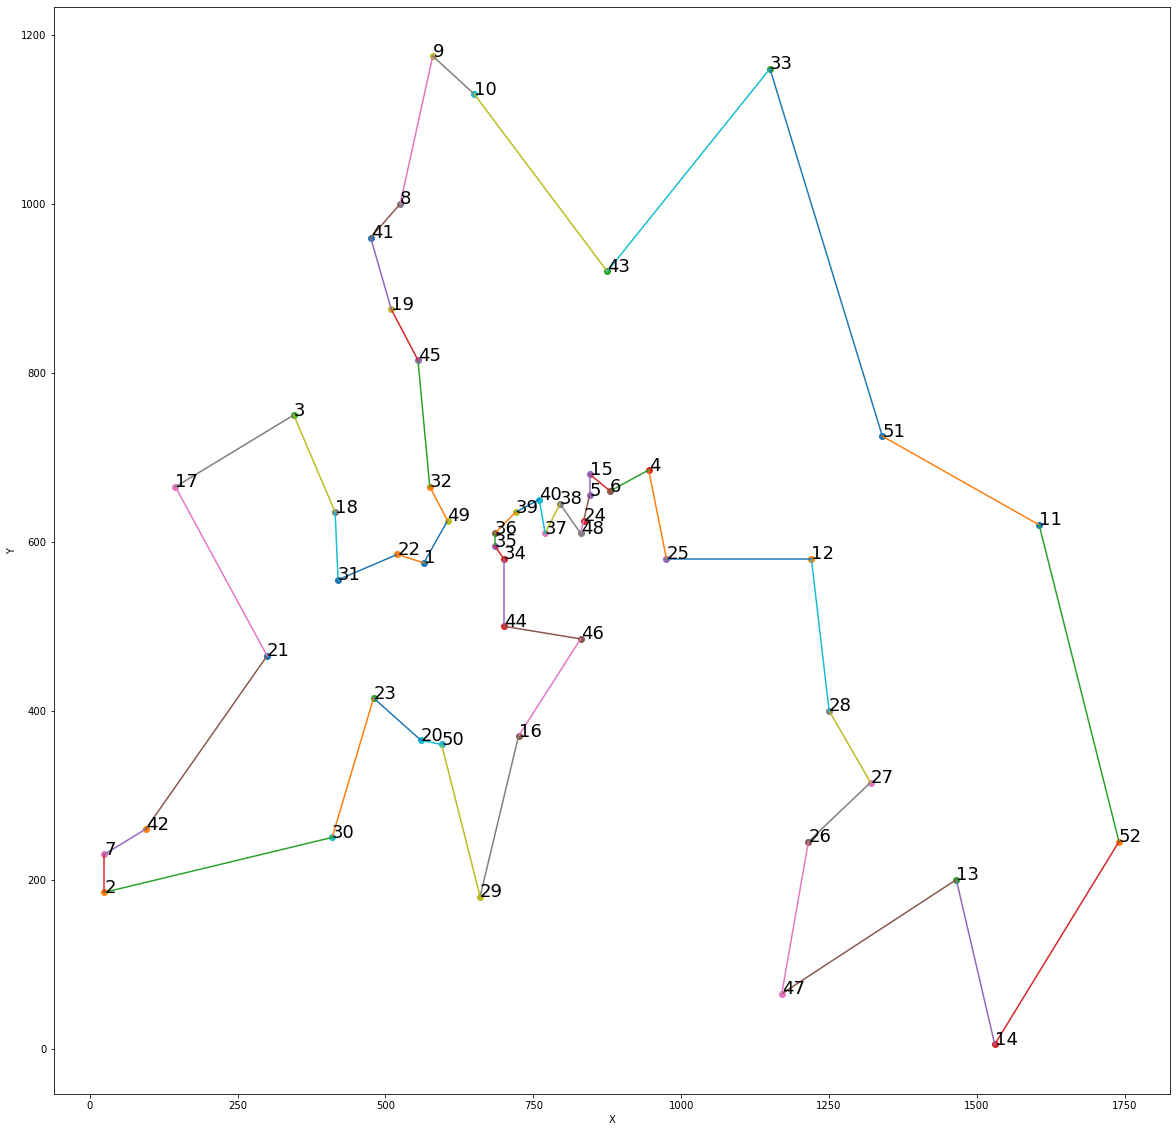

In [5]:
dataset = TSP(name, dimension, dist, coords, optTour)


dataset.plotCities()
dataset.calculateDistanceMatrix()
dataset.calculateOptimalDistance()
dataset.printProblemInfo()
print("\n Distance Matrix:\n", dataset.getDistances())

# **Genetic TSP Class**

In [6]:
class GeneticTSP:
    #Costruttore
    def __init__(self, cities, distances):
        self.cities = cities
        self.distances = distances
        self.population = []
        self.fitnessValues = []
        self.totalDistances = []
        self.cumulativeFitness = []
    
#----------------------------------------------------------------------------------------------
    def generatePopulation(self, popSize):    
        size = len(self.cities)
        self.population = np.zeros((popSize, size), dtype='int')
        for i in range(0, popSize):
            self.population[i] = np.array([random.sample(self.cities, size)])

    def calculateFitness(self):           
        self.fitnessValues = []
        self.totalDistances = []
        for row in self.population:  
            distance = 0
            for i in range(0, len(row)-1):
                distance = distance + self.distances[row[i]-1][row[i+1]-1]
            distance = distance + self.distances[row[len(row)-1]-1][row[0]-1]
            self.totalDistances = np.append(self.totalDistances, distance)
            self.fitnessValues = np.append(self.fitnessValues, 1/distance)
            
        self.cumulativeFitness = np.zeros(len(self.fitnessValues))         
        
        F = self.fitnessValues.sum()                                       
        self.cumulativeFitness[0] = self.fitnessValues[0]                                     
        for i in range(1, len(self.fitnessValues)):    
            self.cumulativeFitness[i] = self.cumulativeFitness[i-1]+self.fitnessValues[i]
        self.cumulativeFitness = self.cumulativeFitness/F
        
    
    def selection(self):                                                                                
        s=0
        a = random.random()                                                          
        while(self.cumulativeFitness[s]<a):
            s+=1 

        t=0
        b = random.random()   
        while(self.cumulativeFitness[t]<b):                                                              
            t+=1
        
        best = np.array([self.population[s], self.population[t]])

        return best

#----------------------------------------------------------------------------------------------
    def doubleCrossover(self, parents):
        size = len(self.population[0])
        
        index = random.sample(range(1, size-1, 1), 2)    
        start = min(index)       
        end = max(index)         
        
        breed = np.zeros((2, size), dtype='int')
        breedTemp = np.zeros((2, size-(end-start)), dtype='int')
        
        breed[0][start:end] = parents[0][start:end]
        breed[1][start:end] = parents[1][start:end]
            
        breedTemp[0] = [city for city in parents[1] if city not in breed[0]]  
        breedTemp[1] = [city for city in parents[0] if city not in breed[1]]

        breed[0][0:start] = breedTemp[0][0:start]
        breed[1][0:start] = breedTemp[1][0:start]

        breed[0][end:size] = breedTemp[0][start:]
        breed[1][end:size] = breedTemp[1][start:]
            
        return breed
    
#----------------------------------------------------------------------------------------------    
    def singleCrossover(self, parents):    
        size = len(self.population[0])
        breed = np.zeros((2, size), dtype='int')
        
        index = random.randrange(1, size, 1)
            
        breed[0][0:index] = parents[0][0:index] 
        breed[1][0:index] = parents[1][0:index]
            
        breed[0][index:size] = [city for city in parents[1] if city not in breed[0]]
        breed[1][index:size] = [city for city in parents[0] if city not in breed[1]]
        
        return breed  
    
#----------------------------------------------------------------------------------------------    
    def mutation(self, breed):
        size = len(self.population[0])
        mutation = np.zeros(size, dtype = 'int') 
        
        index = random.sample(range(0, size, 1), 2) 
        start = min(index)
        end = max(index)

        mutation[0:start] = breed[0:start]                     
        mutation[start:end+1] = np.flip(breed[start:end+1])
        mutation[end+1:size] = breed[end+1:size]
            
        return mutation 
                             
#----------------------------------------------------------------------------------------------        
    def substitution(self, breed):
        dim = min(len(breed),len(self.population)-2)
        
        np.random.shuffle(breed)
            
        j = 0
        for i in np.argsort(self.fitnessValues)[:dim]:
            self.population[i] = breed[j]
            j+=1

#----------------------------------------------------------------------------------------------    
    def getBest(self):
        index = np.argmax(self.fitnessValues)
        bestRoute = np.array(self.population[index])
        bestFitness = self.fitnessValues[index]
        bestDistance = self.totalDistances[index]
        best = [bestRoute, bestFitness, bestDistance]
        return best
    
    def getPopulation(self):
        return self.population
    
    def getFitnessValues(self):
        return self.fitnessValues
    
    def getTotalDistances(self):
        return self.totalDistances
        

# **Genetic Algorithm**

In [9]:
def geneticAlgorithm(cities, distances, iterations, popSize, breedNum, mutationProb):
    
    genTSP = GeneticTSP(cities, distances)
    genTSP.generatePopulation(popSize)
    genTSP.calculateFitness()
    currBest = genTSP.getBest()
    term = False
    
    T=0
    while T< iterations:
        currentBreed = np.empty((0,len(cities)), int)
        
        for i in range(0, breedNum*2, 2):    
            parents = genTSP.selection()
            if (random.random()<=0.5):
                breed = genTSP.doubleCrossover(parents)
            else: 
                breed = genTSP.singleCrossover(parents)

            if (random.random()<=mutationProb):
                breed[0] = genTSP.mutation(breed[0])
                breed[1] = genTSP.mutation(breed[1])

            currentBreed = np.append(currentBreed, [breed[0]], axis=0)
            currentBreed = np.append(currentBreed, [breed[1]], axis=0)     

        genTSP.substitution(currentBreed)
        genTSP.calculateFitness()           
            
        if genTSP.getBest()[2] < currBest[2]:
            currBest = genTSP.getBest()
            term = False  
            
        if T%500 == 0 and T>0:           
            if term:
                T=iterations
            term = True
           
        T+=1  
    return currBest



In [ ]:
a = np.array([50, 100, 150, 200])
b = np.array([1, 5, 10, 15, 20])
c = np.array([0.05, 0.1, 0.3, 0.5, 0.7, 0.9])

results = np.zeros((4,5,6))

pos=0
for i in range(0, len(a)):
    for j in range(0, len(b)):
        for k in range(0, len(c)):
            results[i][j][k] = geneticAlgorithm(dataset.getCities(), dataset.getDistances(), 10000, a[i], b[j], c[k])[2]
            pos+=1
print(results)

In [ ]:
final = []
for i in range(0,10):
    final.append(geneticAlgorithm(dataset.getCities(), dataset.getDistances(), 5000, 50, 15, 0.4))

In [ ]:
distances = []

print("Risultati ottenuti:")
for i in range(0,10):
    print(final[i][2])
    distances.append(final[i][2])
    
print("\nRisultati ottenuti (gap):")
for i in range(0,10):
    print((abs(dataset.getOptDist() - final[i][2])/abs(dataset.getOptDist()))*100)

print("\nMedia:",st.mean(distances))

bestRoute = final[np.argmin(distances)]

print("\nPercorso migliore:", bestRoute[0], "in posizione",np.argmin(distances))

# **Visualization**

Percorso migliore: [ 5 38 37 40 39 36 35 34 44  1 49 32 22 31 18 17  3 45 19 41  8  9 10 33
 43  4 25 12 51 11 52 14 13 27 28 26 47 29 30  2  7 42 21 23 20 50 16 46
 48 24  6 15] 
Fitness: 0.00012430714077152794 
Distance: 8044.590148187578


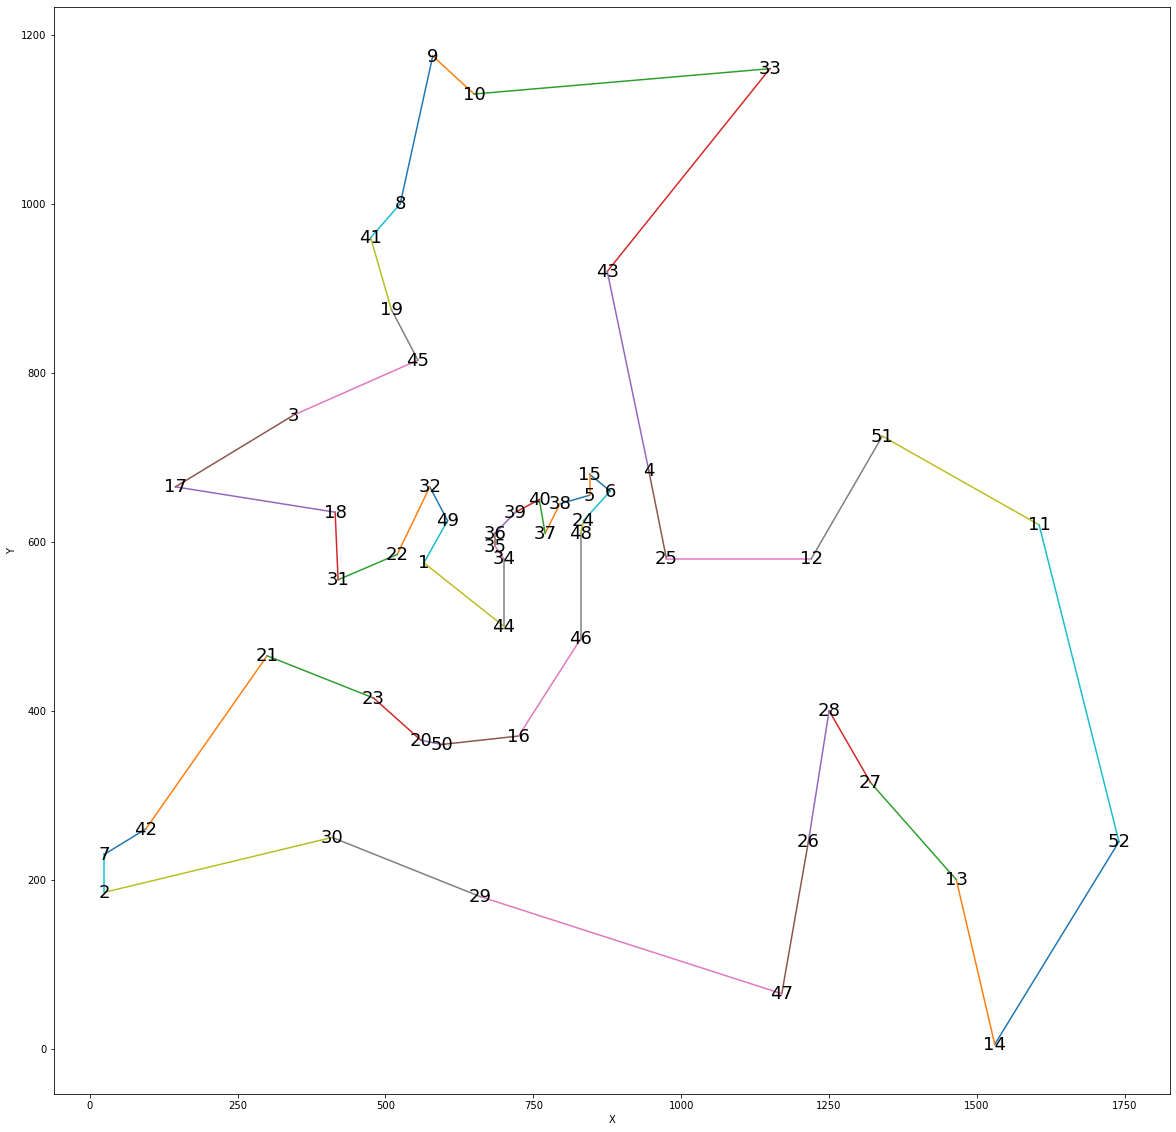

In [14]:
print("Percorso migliore:",bestRoute[0],"\nFitness:",bestRoute[1],"\nDistance:",bestRoute[2])
route = bestRoute[0]    

plt.figure(figsize=(20,20))

for i in range(0,len(route)):
    plt.text(coords[i][1],coords[i][2], str(i+1),fontsize=18, verticalalignment='center', horizontalalignment='center')
    
for i in range(0,len(route)-1):
    plt.plot([coords[route[i]-1][1],coords[route[i+1]-1][1]],[coords[route[i]-1][2],coords[route[i+1]-1][2]])   #-1 perché il vettore va da 0 a N-1 e le città vanno da 1 a N
plt.plot([coords[route[len(route)-1]-1][1],coords[route[0]-1][1]],[coords[route[len(route)-1]-1][2],coords[route[0]-1][2]])

plt.xlabel('X');
plt.ylabel('Y');
plt.show()
